In [329]:
pip install mysql-connector-python


In [330]:
import mysql.connector
import pandas as pd

# Database connection details
host = "18.136.157.135"
port = 3306
database = "project_sales"
user = "dm_team2"
password = "DM!$Team&27@9!20!"

# Connect to MySQL
try:
    connection = mysql.connector.connect(
        host=host,
        port=port,
        user=user,
        password=password,
        database=database
    )

    print("✅ Connection successful!")

    # Query the data
    query = "SELECT * FROM data"
    df = pd.read_sql(query, connection)

    print("📄 Data loaded successfully!")
    print(df.head())

except mysql.connector.Error as err:
    print("❌ Error:", err)

finally:
    if connection.is_connected():
        connection.close()
        print("🔌 MySQL connection closed.")


✅ Connection successful!
📄 Data loaded successfully!
            Created Product_ID   Source      Mobile               EMAIL  \
0  14-11-2018 10:05             Website  984XXXXXXX  aXXXXXXX@gmail.com   
1  14-11-2018 09:22             Website     XXXXXXX             #VALUE!   
2  14-11-2018 09:21             Website     XXXXXXX  dXXXXXXX@yahoo.com   
3  14-11-2018 08:46             Website     XXXXXXX  wXXXXXXX@gmail.com   
4  14-11-2018 07:34             Website     XXXXXXX  cXXXXXXX@gmail.com   

      Sales_Agent Location Delivery_Mode Status  
0  Sales-Agent-11                 Mode-5   Open  
1  Sales-Agent-10                 Mode-5   Open  
2  Sales-Agent-10                 Mode-5   Open  
3  Sales-Agent-10                 Mode-5   Open  
4  Sales-Agent-10                 Mode-5   Open  
🔌 MySQL connection closed.


In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [332]:
# @title EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [333]:
df.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [334]:
df

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [335]:
# Shape of df
print("Shape:", df.shape)

# df types and non-null counts
print(df.info())

# Check missing values
print(df.isnull().sum())


Shape: (7422, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB
None
Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64


In [336]:
print(df.describe(include='all'))  # For both numerical and categorical df


                 Created Product_ID Source Mobile    EMAIL    Sales_Agent  \
count               7422       7422   7422   7422     7422           7422   
unique              6752         30     26    487      883             13   
top     26-09-2018 11:30         18   Call         #VALUE!  Sales-Agent-4   
freq                   4       1711   2547   1810     1701           1500   

               Location Delivery_Mode     Status  
count              7422          7422       7422  
unique               18             5         11  
top     Other Locations        Mode-5  Junk Lead  
freq               2500          2975       1536  


In [337]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Created: 6752 unique values
Product_ID: 30 unique values
Source: 26 unique values
Mobile: 487 unique values
EMAIL: 883 unique values
Sales_Agent: 13 unique values
Location: 18 unique values
Delivery_Mode: 5 unique values
Status: 11 unique values


In [338]:
print(df['Status'].value_counts())


Status
Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: count, dtype: int64


### EXPLOTARY df ANALYSIS

In [339]:
### Univariate Analysis

1.Product ID

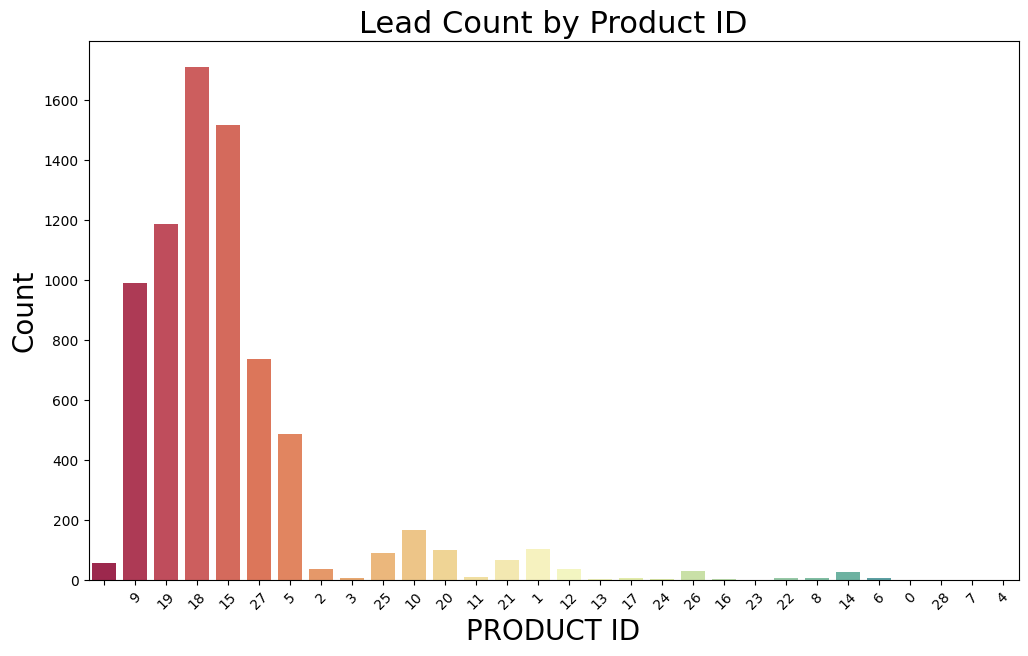

In [340]:

plt.figure(figsize=(12, 7))
sns.countplot(x='Product_ID', data=df, palette='Spectral')  # ✅ fixed both issues
plt.xlabel('PRODUCT ID', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(rotation=45)
plt.title('Lead Count by Product ID', fontsize=22)
plt.show()

##### OBSERVATION:
* In this plot we are clearly seen that 18,15,19,27,9 and 5 Product ID has more sold product.
* Remaining all product ID has less sold product.

2.Source

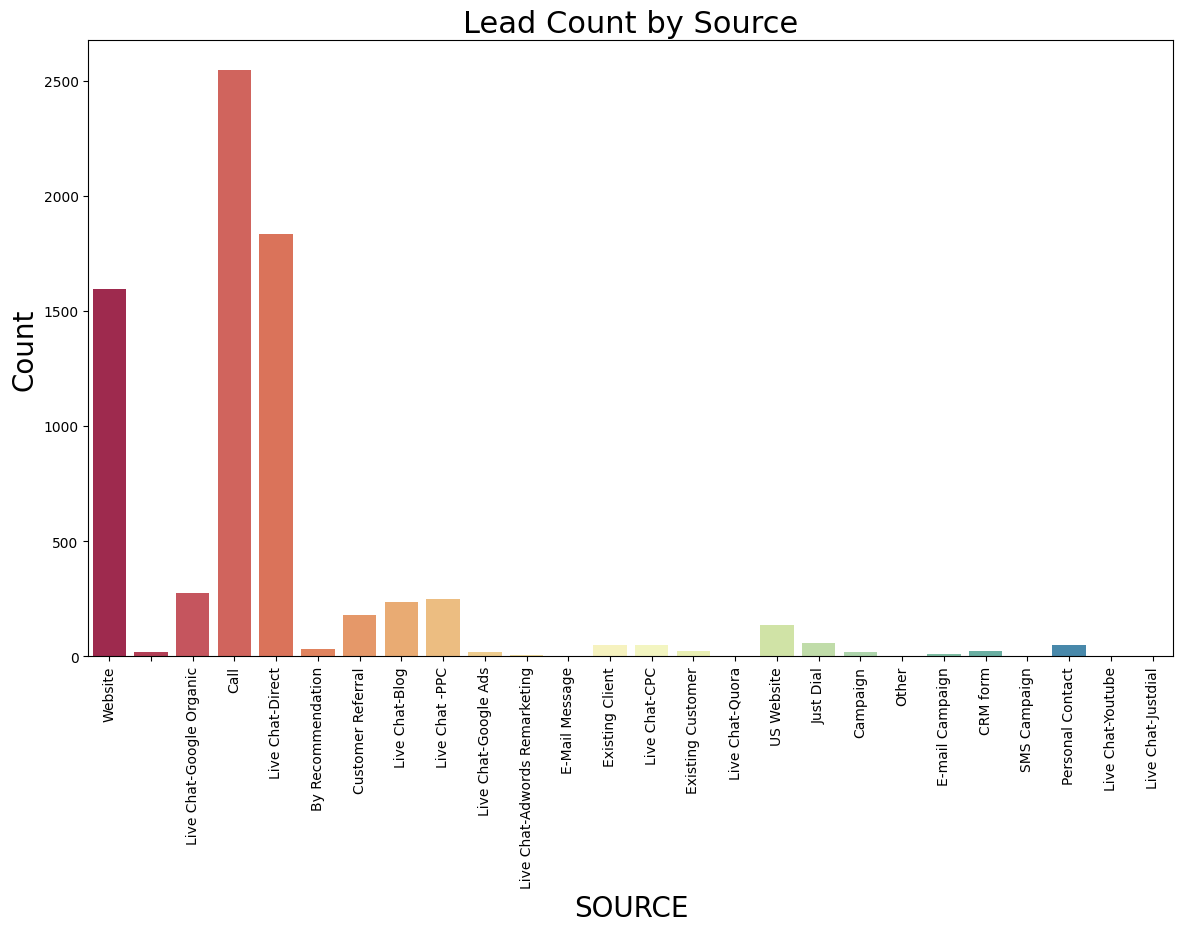

In [341]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Source', data=df, palette='Spectral')
plt.xticks(rotation=90)
plt.xlabel('SOURCE', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Lead Count by Source', fontsize=22)
plt.show()


##### OBSERVATION:
* Most of the sales has call, live chat direct and website source.
* Remaining all sources has less than 250.

3.Sales Agent

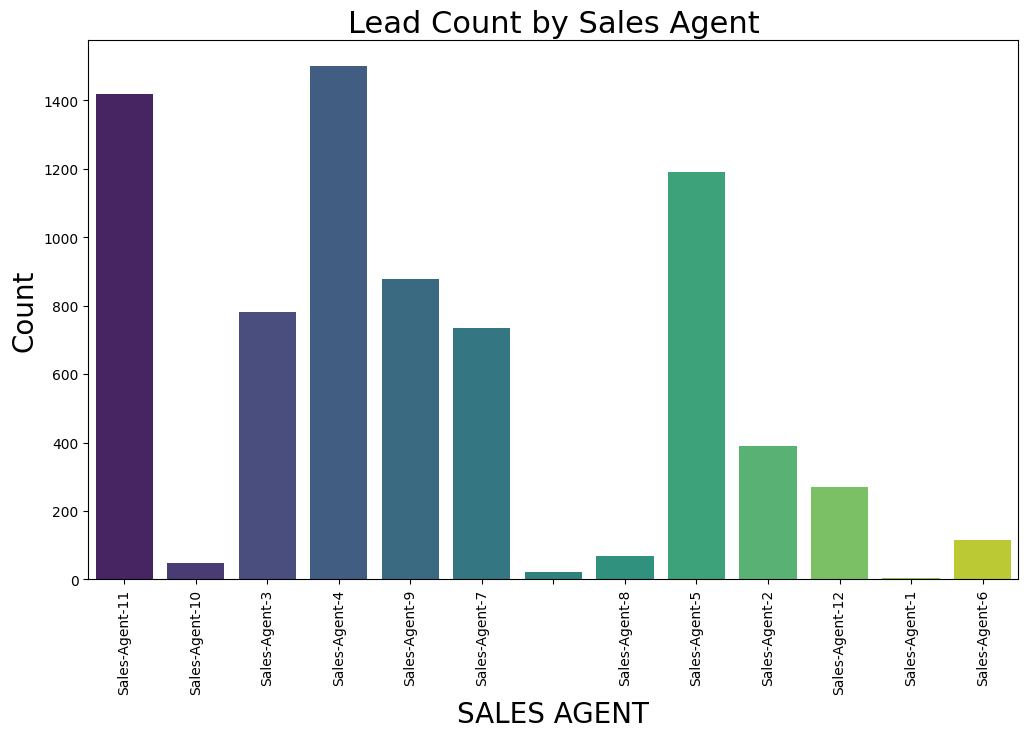

In [342]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Sales_Agent', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('SALES AGENT', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Lead Count by Sales Agent', fontsize=22)
plt.show()

##### OBSERVATION:
* In this plot we are cleary seen the total 12 sales agent .
* Most of the sales is done by sales agent 4 and sales agent 11 as well as sales agent 5.
* Sales agent 3,9,7 has below than 850 sale.
* Remaining all sales agent has done less sale.

4.Location

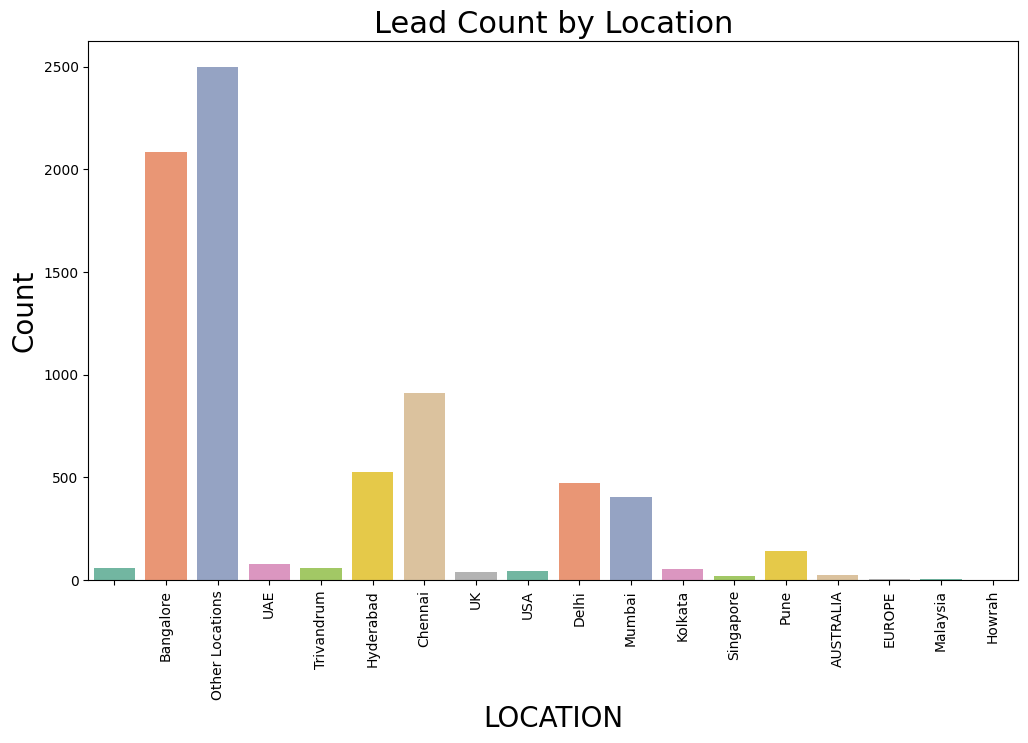

In [343]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Location', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('LOCATION', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Lead Count by Location', fontsize=22)
plt.show()


##### OBSERVATION:
* Total 17 location of sales with include foreign and india.
* Banglore and other location has more sales
* chennai,hydrabad, delhi and mumbai city sale less than banglore and other location
* Remaining all city has extreme less sale.

5.Delivery Mode

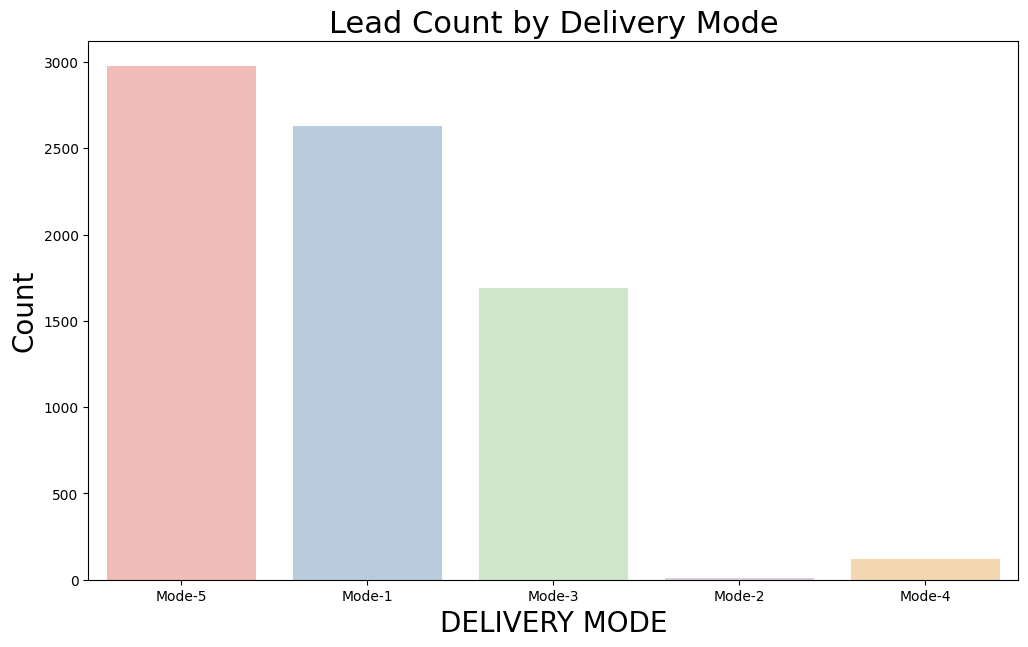

In [344]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Delivery_Mode', data=df, palette='Pastel1')
plt.xlabel('DELIVERY MODE', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Lead Count by Delivery Mode', fontsize=22)
plt.show()


##### OBSERVATION:
* In this plot we are clearly seen the five types of delivery mode.
* Delivery Mode 5 has maximum use as well as highest count
* Mode 1 & Mode 3 has less use than mode 5
* Mode 2 & 4 is minimum use for delivery

6.Status

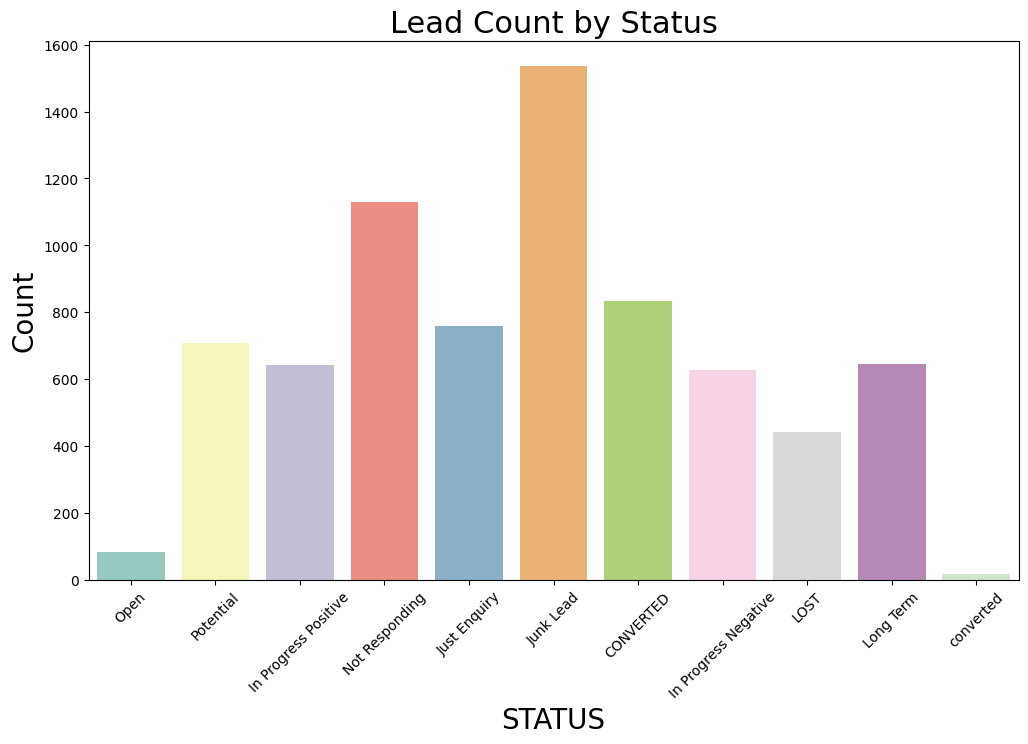

In [345]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Status', data=df, palette='Set3')
plt.xticks(rotation=45)
plt.xlabel('STATUS', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Lead Count by Status', fontsize=22)
plt.show()


##### OBSERVATION:
* In this plot we are clearly seen the junk lead means low potential customer or client has more.
* Not responding status customer has less than 1200.
* From above graph we can say that low potential customer has more and high potential cutomer has less.

###  NOTE:
* Here we can not perform any bivariate and multivarite analysis because we dont have any numerical feature so here we are apply certain condition and get most frequent label in feature.

In [346]:
#### 1.Getting the source call with the delivery mode-5

In [347]:
df.loc[(df.Source == "Call") & (df.Delivery_Mode == "Mode-5")]

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
19,13-11-2018 18:48,19,Call,701XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Potential
28,13-11-2018 16:09,27,Call,994XXXXXXX,mXXXXXXXs@mail.com,Sales-Agent-11,Chennai,Mode-5,In Progress Positive
40,13-11-2018 12:26,9,Call,992XXXXXXX,gXXXXXXXologies.in,Sales-Agent-4,Chennai,Mode-5,Potential
43,13-11-2018 11:29,2,Call,894XXXXXXX,#VALUE!,Sales-Agent-9,Other Locations,Mode-5,In Progress Positive
44,13-11-2018 11:29,9,Call,888XXXXXXX,sXXXXXXXe@live.com,Sales-Agent-11,Bangalore,Mode-5,In Progress Positive
...,...,...,...,...,...,...,...,...,...
7374,30-04-2018 10:38,15,Call,,#VALUE!,Sales-Agent-11,Other Locations,Mode-5,Junk Lead
7396,28-04-2018 16:12,15,Call,,#VALUE!,Sales-Agent-7,Other Locations,Mode-5,Junk Lead
7398,28-04-2018 16:11,15,Call,,#VALUE!,Sales-Agent-2,Delhi,Mode-5,Junk Lead
7399,28-04-2018 16:08,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,In Progress Negative


In [348]:
# Get the percentqage of sorce call with delivery mode-5
len(df.loc[(df.Source == "Call") & (df.Delivery_Mode == "Mode-5")])/7422*100

20.89733225545675

* Here almost 21% customer/client is preferred call with delivery mode-5

2.Getting the Sales agent 11 with potential status

In [349]:
df.loc[(df.Sales_Agent == 'Sales-Agent-11') & (df.Status == 'Potential')]

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
24,13-11-2018 17:09,18,Website,790XXXXXXX,gXXXXXXX@gmail.com,Sales-Agent-11,Trivandrum,Mode-1,Potential
32,13-11-2018 15:15,27,Live Chat-Direct,858XXXXXXX,#VALUE!,Sales-Agent-11,Hyderabad,Mode-3,Potential
35,13-11-2018 13:52,9,Website,900XXXXXXX,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Potential
51,13-11-2018 11:09,15,Call,994XXXXXXX,#VALUE!,Sales-Agent-11,Other Locations,Mode-5,Potential
70,12-11-2018 17:23,18,Website,902XXXXXXX,mXXXXXXX@gmail.com,Sales-Agent-11,Chennai,Mode-1,Potential
...,...,...,...,...,...,...,...,...,...
5878,05-06-2018 16:32,18,Website,,mXXXXXXX@gmail.com,Sales-Agent-11,Hyderabad,Mode-1,Potential
5881,05-06-2018 15:19,10,Website,,sXXXXXXX@cisco.com,Sales-Agent-11,Delhi,Mode-1,Potential
6812,13-05-2018 16:20,27,Live Chat-Adwords Remarketing,,gXXXXXXX@gmail.com,Sales-Agent-11,Chennai,Mode-3,Potential
6886,10-05-2018 21:30,5,,,aXXXXXXX.j@pwc.com,Sales-Agent-11,Other Locations,Mode-1,Potential


In [350]:
# Getting the percentage
len(df.loc[(df.Sales_Agent == 'Sales-Agent-11') & (df.Status == 'Potential')])/7422*100

3.354890864995958

* Sales-Agent-11 has only 3% potential customer.

In [351]:
#### 3.Getting all junck lead Status customer with percentage

In [352]:
df.loc[df['Status'] == 'Junk Lead']

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
36,13-11-2018 13:34,19,Website,982XXXXXXX,vXXXXXXX@gmail.com,Sales-Agent-7,Other Locations,Mode-1,Junk Lead
74,12-11-2018 15:17,15,Call,883XXXXXXX,#VALUE!,Sales-Agent-9,Other Locations,Mode-5,Junk Lead
76,12-11-2018 15:15,15,Call,886XXXXXXX,#VALUE!,Sales-Agent-11,Other Locations,Mode-5,Junk Lead
88,12-11-2018 13:16,15,Call,790XXXXXXX,#VALUE!,Sales-Agent-7,Other Locations,Mode-5,Junk Lead
89,12-11-2018 13:16,15,Call,974XXXXXXX,#VALUE!,Sales-Agent-11,Other Locations,Mode-5,Junk Lead
...,...,...,...,...,...,...,...,...,...
7396,28-04-2018 16:12,15,Call,,#VALUE!,Sales-Agent-7,Other Locations,Mode-5,Junk Lead
7398,28-04-2018 16:11,15,Call,,#VALUE!,Sales-Agent-2,Delhi,Mode-5,Junk Lead
7401,28-04-2018 15:35,18,Live Chat-Blog,,gXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,Junk Lead
7405,28-04-2018 13:35,18,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-3,Bangalore,Mode-1,Junk Lead


In [353]:
# Getting the percentage
len(df.loc[df['Status'] == 'Junk Lead'])/7422*100

20.695230396119644

* Here 20% customer satuts is junk lead.

4.Getting Banglore location with their percentage

In [354]:
df.loc[df['Location'] == 'Bangalore']

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
18,13-11-2018 18:51,9,Live Chat-Google Organic,971XXXXXXX,mXXXXXXX@gmail.com,Sales-Agent-3,Bangalore,Mode-1,Potential
26,13-11-2018 16:37,18,Call,740XXXXXXX,nXXXXXXX@gmail.com,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive
31,13-11-2018 15:16,18,Call,953XXXXXXX,#VALUE!,Sales-Agent-7,Bangalore,Mode-1,Not Responding
33,13-11-2018 14:11,9,By Recommendation,974XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-7,Bangalore,Mode-4,Potential
34,13-11-2018 13:53,9,Call,974XXXXXXX,#VALUE!,Sales-Agent-4,Bangalore,Mode-1,Potential
...,...,...,...,...,...,...,...,...,...
7409,28-04-2018 12:19,19,Call,,aXXXXXXX@gmail.com,Sales-Agent-2,Bangalore,Mode-4,Long Term
7410,28-04-2018 11:58,18,Call,,aXXXXXXX@gmail.com,Sales-Agent-4,Bangalore,Mode-1,CONVERTED
7412,28-04-2018 11:25,18,Just Dial,,cXXXXXXX@gmail.com,Sales-Agent-3,Bangalore,Mode-1,Long Term
7415,28-04-2018 10:50,21,Live Chat-Direct,,aXXXXXXX@gmail.com,Sales-Agent-4,Bangalore,Mode-1,In Progress Negative


In [355]:
# Getting percentage
len(df.loc[df['Location'] == 'Bangalore'])/4722*100

44.13384159254553

Maximum 44% Customer from bangalore.

#### 5.Getting the maximum selling product with their percentage

In [356]:
df.loc[df['Product_ID'] == '18']

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
24,13-11-2018 17:09,18,Website,790XXXXXXX,gXXXXXXX@gmail.com,Sales-Agent-11,Trivandrum,Mode-1,Potential
26,13-11-2018 16:37,18,Call,740XXXXXXX,nXXXXXXX@gmail.com,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive
27,13-11-2018 16:35,18,Live Chat-Direct,XXXXXXX,nXXXXXXXabirla.com,Sales-Agent-9,Other Locations,Mode-3,Not Responding
31,13-11-2018 15:16,18,Call,953XXXXXXX,#VALUE!,Sales-Agent-7,Bangalore,Mode-1,Not Responding
37,13-11-2018 13:15,18,Live Chat-Google Organic,754XXXXXXX,kXXXXXXXiimu.ac.in,Sales-Agent-9,Bangalore,Mode-1,In Progress Positive
...,...,...,...,...,...,...,...,...,...
7405,28-04-2018 13:35,18,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-3,Bangalore,Mode-1,Junk Lead
7406,28-04-2018 13:20,18,Live Chat-CPC,,mXXXXXXX@gmail.com,Sales-Agent-2,Hyderabad,Mode-1,LOST
7410,28-04-2018 11:58,18,Call,,aXXXXXXX@gmail.com,Sales-Agent-4,Bangalore,Mode-1,CONVERTED
7412,28-04-2018 11:25,18,Just Dial,,cXXXXXXX@gmail.com,Sales-Agent-3,Bangalore,Mode-1,Long Term


In [357]:
# Get percentage
len(df.loc[df['Product_ID'] == '18'])/4722*100

36.23464633629818

* 36% product id is 18

##### 6.Getting website source and open status with sales agent 10

In [358]:
df.loc[(df.Source == 'Website') & (df.Status == 'Open') ].head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [359]:
# Getting the percentage
len(df.loc[(df.Source == 'Website') & (df.Status == 'Open')])/4722*100

0.8047437526471835

* Here only 0.8% customer/client source is website and open status.

**df Preprocessing/Feature Engineering**

1.checking missing Values

In [360]:
# Replace blank spaces to nan
df.replace('',np.nan,inplace=True)
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [361]:
df.isnull().sum()

,0
Created,0
Product_ID,58
Source,17
Mobile,1810
EMAIL,0
Sales_Agent,23
Location,58
Delivery_Mode,0
Status,0


* In this df set 5 feature contain missing value with including unique feature.
* Not handle unique feature missing value
* Remaining feature missing value impute with mode.


In [362]:
# 1.Product ID
# use mode because of less product id as well as most frequent no.
df.Product_ID.mode()

,Product_ID
0,18


In [363]:
df.loc[df['Product_ID'].isnull()==True,'Product_ID']= 18

In [364]:
# 2.Source -------> impute with mode because of categorical feature
df.Source.mode()

,Source
0,Call


In [365]:
df.loc[df['Source'].isnull()==True,'Source']= 'Call'

In [366]:
# 3.Sales agent -------> impute with mode because of categorical feature
df.Sales_Agent.mode()

,Sales_Agent
0,Sales-Agent-4


In [367]:
df.loc[df['Sales_Agent'].isnull()==True,'Sales_Agent']= 'SalesAgent4'

In [368]:
# 4.Location --------> impute with mode because of categorical feature
df.Location.mode()

,Location
0,Other Locations


In [369]:
df.loc[df['Location'].isnull()==True,'Location']= 'Other Locations'

In [370]:
# Checking missing value after imputation
df.isnull().sum()

,0
Created,0
Product_ID,0
Source,0
Mobile,1810
EMAIL,0
Sales_Agent,0
Location,0
Delivery_Mode,0
Status,0


#### 2.FEATURES IS CONTAIN LOTS OF DIFFERENT LABEL SO WE COMPRESSES AND MERGED THE LABEL

In [371]:
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,18,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,Other Locations,Mode-5,Open
1,14-11-2018 09:22,18,Website,XXXXXXX,#VALUE!,Sales-Agent-10,Other Locations,Mode-5,Open
2,14-11-2018 09:21,18,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,Other Locations,Mode-5,Open
3,14-11-2018 08:46,18,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open
4,14-11-2018 07:34,18,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open


In [372]:
## 1.PRODUCT_id

In [373]:
# In this feature 13 product id has been sold minimum so we can replace into minimum sold product
df.Product_ID.replace(['11','22','3','17','6','8','13','24','16','23','0','28','7','4'],'minimum sold',inplace=True)

#### 2.SOURCE

In [374]:
# This feature is contain total 25 label in that synthetic search/inquery of customer in different category
# so we make groups and put similar labels in one group like [(Live ChatDirect,Live ChatGoogle Organic,Live Chat PPC)--> live chats]


## 1st group ---- Live chat
df.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat-PPC','Live Chat-Blog','Live Chat-CPC',
                    'Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Quora','Live Chat-Youtube',
                    'Live Chat-Justdial'],'live chat',inplace=True)

In [375]:
## 2nd group ---- new client

df.Source.replace(['Existing Client','Personal Contact','CRM form','Existing Customer'],'new client',inplace=True)

In [376]:
## 4th group --- recommendation

df.Source.replace(['Customer Referral','By Recommendation'],'recommendation',inplace=True)

In [377]:
## 5th group ---- campign
df.Source.replace(['Campaign','E-mail Campaign','SMS Campaign','E-Mail Message'],'campaign',inplace=True)

In [378]:
# Checking the valu counts
df.Source.value_counts()

,count
Source,
Call,2564
live chat,2428
Website,1594
Live Chat -PPC,249
recommendation,212
new client,146
US Website,137
Just Dial,56
campaign,34


#### 3.LOCATION

In [379]:
# This feature all country city location include so we are merge into different group

## 1st group ---- Other location
df.Location.replace(['Trivandrum','Kolkata','Howrah'],'Other Locations',inplace=True)

## 2nd group ---
df.Location.replace(['UAE','Malaysia','Singapore'],'asia',inplace=True)

## 3rd group
df.Location.replace(['USA','UK','AUSTRALIA','EUROPE'],'west country',inplace=True)

In [380]:
df.Location.value_counts()

,count
Location,
Other Locations,2672
Bangalore,2084
Chennai,909
Hyderabad,528
Delhi,471
Mumbai,402
Pune,142
west country,114
asia,100


#### 4.STATUS

In [381]:
 #This is target veriable here we are seprate the label & make group like high potential, and low potential

## 1st group --- low potential
df.Status.replace(['Junk Lead','Not Responding','In Progress Negative','Just Enquiry','LOST'],'low potential',inplace=True)

## 2nd group --- high potential
df.Status.replace(['CONVERTED','Potential','Long Term','In Progress Positive','Open','converted'],'high potential',inplace=True)

In [382]:
df.Status.value_counts()

,count
Status,
low potential,4491
high potential,2931


### 3.CATEGORICAL df CONVERSION

In [383]:
## 1.Product_ID

# here we use frequency encoding because of mannual encoding is work
# Assign with zero because minimum sold product
df.loc[df['Product_ID']=='minimum sold','Product_ID']=0

In [384]:
## 2.Source --------> frequency encoding

# because of maximum label and nominal df-type
df.loc[df['Source']=='Live Chat-Direct','Source']=19
df.loc[df['Source']=='Call','Source']=18
df.loc[df['Source']=='Website','Source']=17
df.loc[df['Source']=='Live Chat-Google organic','Source']=16
df.loc[df['Source']=='Live Chat-PPC','Source']=15
df.loc[df['Source']=='Live Chat-Blog','Source']=14
df.loc[df['Source']=='recommendation','Source']=13
df.loc[df['Source']=='new client','Source']=12
df.loc[df['Source']=='US website','Source']=11
df.loc[df['Source']=='Just Dial','Source']=10
df.loc[df['Source']=='Live Chat-CPC','Source']=9
df.loc[df['Source']=='Live Chat-Google Ads','Source']=8
df.loc[df['Source']=='campaign','Source']=7
df.loc[df['Source']=='E-mail campaign','Source']=6
df.loc[df['Source']=='Live Chat-Adwords remarketing','Source']=5
df.loc[df['Source']=='Live Chat-Quora','Source']=4
df.loc[df['Source']=='Live Chat-Youtube','Source']=3
df.loc[df['Source']=='E-mail Message','Source']=2
df.loc[df['Source']=='Live Chat-Justdial','Source']=1
df.loc[df['Source']=='Other','Source']=0

In [385]:
## 3.Sales Agent ----------> frequency encoding

# because of maximum label and nominal df-type
df.loc[df['Sales_Agent']=='Sales-Agent-4','Sales_Agent']=11
df.loc[df['Sales_Agent']=='Sales-Agent-11','Sales_Agent']=10
df.loc[df['Sales_Agent']=='Sales-Agent-5','Sales_Agent']=9
df.loc[df['Sales_Agent']=='Sales-Agent-9','Sales_Agent']=8
df.loc[df['Sales_Agent']=='Sales-Agent-3','Sales_Agent']=7
df.loc[df['Sales_Agent']=='Sales-Agent-7','Sales_Agent']=6
df.loc[df['Sales_Agent']=='Sales-Agent-2','Sales_Agent']=5
df.loc[df['Sales_Agent']=='Sales-Agent-12','Sales_Agent']=4
df.loc[df['Sales_Agent']=='Sales-Agent-6','Sales_Agent']=3
df.loc[df['Sales_Agent']=='Sales-Agent-8','Sales_Agent']=2
df.loc[df['Sales_Agent']=='Sales-Agent-10','Sales_Agent']=1
df.loc[df['Sales_Agent']=='SalesAgent4','Sales_Agent']=0
df.loc[df['Sales_Agent']=='Sales-Agent-1','Sales_Agent']=0

In [386]:
## 4.Location --------> frequency encoding

# because of maximum label and nominal df-type
df.loc[df['Location']=='Other Locations','Location']=8
df.loc[df['Location']=='Bangalore','Location']=7
df.loc[df['Location']=='Chennai','Location']=6
df.loc[df['Location']=='Hyderabad','Location']=5
df.loc[df['Location']=='Delhi','Location']=4
df.loc[df['Location']=='Mumbai','Location']=3
df.loc[df['Location']=='Pune','Location']=2
df.loc[df['Location']=='west country','Location']=1
df.loc[df['Location']=='asia','Location']=0

In [387]:
## 4. Delivery_Mode--------> frequency encoding

# because of maximum label and nominal df-type
df.loc[df['Delivery_Mode'] == 'Mode-5','Delivery_Mode']=4
df.loc[df['Delivery_Mode'] == 'Mode-1','Delivery_Mode']=3
df.loc[df['Delivery_Mode'] == 'Mode-3','Delivery_Mode']=2
df.loc[df['Delivery_Mode'] == 'Mode-4','Delivery_Mode']=1
df.loc[df['Delivery_Mode'] == 'Mode-2','Delivery_Mode']=0


In [388]:
## 5. Status--------> one hot encoding

# because of only two labels and nominal df-typa
df.loc[df['Status']=='low potential','Status']=1
df.loc[df['Status']=='high potential','Status']=0

In [389]:
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,18,17,984XXXXXXX,aXXXXXXX@gmail.com,10,8,4,0
1,14-11-2018 09:22,18,17,XXXXXXX,#VALUE!,1,8,4,0
2,14-11-2018 09:21,18,17,XXXXXXX,dXXXXXXX@yahoo.com,1,8,4,0
3,14-11-2018 08:46,18,17,XXXXXXX,wXXXXXXX@gmail.com,1,8,4,0
4,14-11-2018 07:34,18,17,XXXXXXX,cXXXXXXX@gmail.com,1,8,4,0


# Feature Selection

### 1.DROP UNIQUE AND CONSTANT COLUMN
* In this dataset total 3 unique column available(created, mobile, and email) so im drop this column.
* Product_Id is not unique column in this data so we are not drop this column

In [390]:
df.drop(['Created','Mobile','EMAIL'],axis=1,inplace=True)

In [391]:
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,18,17,10,8,4,0
1,18,17,1,8,4,0
2,18,17,1,8,4,0
3,18,17,1,8,4,0
4,18,17,1,8,4,0


### 2.CHANGING DATA TYPE BEFORE GET CORRELATION

In [392]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode']

for col in label_cols:
    df[col] = df[col].astype(str)                  # convert everything to strings
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])            # this converts to int automatically


## 3.Checking Correlation

In [393]:
df.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,0.025795,0.027855,-0.155389,-0.180974,-0.119904
Source,0.025795,1.000000,-0.021877,-0.184293,-0.113725,0.064755
Sales_Agent,0.027855,-0.021877,1.000000,0.046673,-0.187865,-0.017016
Location,-0.155389,-0.184293,0.046673,1.000000,0.209398,0.080861
Delivery_Mode,-0.180974,-0.113725,-0.187865,0.209398,1.000000,0.161352
Status,-0.119904,0.064755,-0.017016,0.080861,0.161352,1.000000


In [394]:
print(df['Status'].dtype)  # likely still 'object'


object


# Plotting Heatmap of Correlation

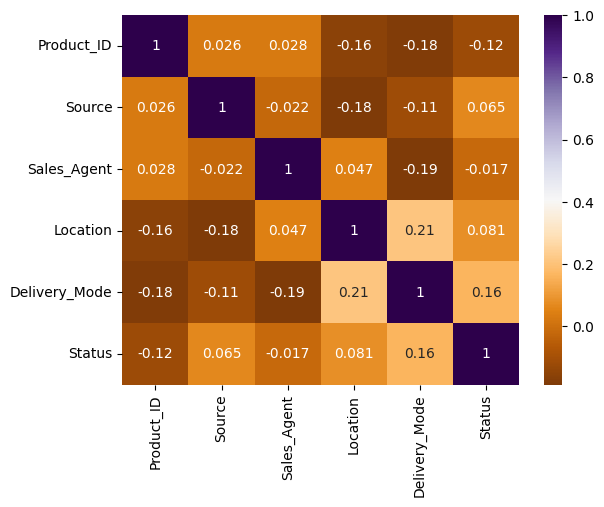

In [395]:
sns.heatmap(df.corr(),annot=True,cmap='PuOr')
plt.show()

no highly correlated feature available

# Save preprocess data

In [396]:
df.to_csv("preprocess.csv")
df = pd.read_csv("preprocess.csv")
df.head()

,Unnamed: 0,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,0,6,4,2,8,4,0
1,1,6,4,1,8,4,0
2,2,6,4,1,8,4,0
3,3,6,4,1,8,4,0
4,4,6,4,1,8,4,0


# Model creation

### AIM:
* Create a sweet spots model [Low bias and Low veriance model]
* Improve accuracy score

### HERE WE WILL BE EXPERIMENTING WITH SEVEN ALGORITHM

1. Logistic regression.
2. KNeighbourClassifier
3. Decision Tree Classifier
4. Random Forest Classifier
5. Grediant Boosting Classifier
6. Artifical neural network

In [397]:
# define independent and dependent variable

In [398]:
X = df.iloc[:,1:6]
y = df.Status

In [399]:
X.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,6,4,2,8,4
1,6,4,1,8,4
2,6,4,1,8,4
3,6,4,1,8,4
4,6,4,1,8,4


In [400]:
y.head()

,Status
0,0
1,0
2,0
3,0
4,0


In [401]:
# Balancing the target column using smote

In [402]:
df.Status.value_counts()

,count
Status,
1,4491
0,2931


<Axes: xlabel='Status', ylabel='count'>

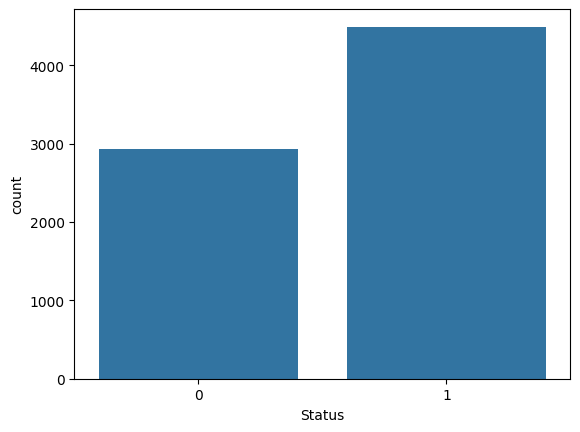

In [405]:

sns.countplot(x='Status', data=df)


In [407]:
# balancing data
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE() #object creation
print("unbalanced data",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print('Balanced data',Counter(y_sm))

unbalanced data Counter({1: 4491, 0: 2931})
Balanced data Counter({0: 4491, 1: 4491})


#### SPLIT TRAINING AND TESTING DATA

In [408]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=42)

In [409]:
X_train.shape

(7185, 5)

In [410]:
X_test.shape

(1797, 5)

In [411]:
y_train.shape

(7185,)

In [412]:
y_test.shape

(1797,)

### 1.Logistic Regression

In [413]:
# Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation
log_reg = LogisticRegression(random_state=5)

# Step:3 fitting the training data
log_reg.fit(X_train,y_train)

# Step:4 Prediction on test data
log_test_predict = log_reg.predict(X_test)

# Step:5 Prediction on training data
log_train_predict = log_reg.predict(X_train)

### EVALUATION

In [414]:
# Import library
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
log_train_accuracy = accuracy_score(log_train_predict,y_train)
print("Training accuracy of Logistic regression model",log_train_accuracy*100)
print("Logistic regression training Classification report: \n",classification_report(log_train_predict,y_train))

Training accuracy of Logistic regression model 58.594293667362564
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.55      0.59      0.57      3322
           1       0.62      0.58      0.60      3863

    accuracy                           0.59      7185
   macro avg       0.59      0.59      0.59      7185
weighted avg       0.59      0.59      0.59      7185



the model is not perfoem well on the training data

#### TEST ACCURACY

In [415]:
log_test_accuracy = accuracy_score(log_test_predict,y_test)
print("Testing accuracy of Logistic regression model",log_test_accuracy*100)
print("Logistic regression testing Classification report: \n",classification_report(log_test_predict,y_test))

Testing accuracy of Logistic regression model 60.37840845854201
Logistic regression testing Classification report: 
               precision    recall  f1-score   support

           0       0.56      0.63      0.59       826
           1       0.65      0.58      0.61       971

    accuracy                           0.60      1797
   macro avg       0.61      0.61      0.60      1797
weighted avg       0.61      0.60      0.60      1797



Model is not perfoem well on testing data

### 2.KNeighboursClassifier

In [416]:
# Step:1 Taking the optimal value of k
from sklearn.neighbors import KNeighborsClassifier
error_rate = [] # Creating empty list
for i in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_knn_predict = knn.predict(X_test)
    error_rate.append(np.mean(y_knn_predict != y_test))
print("Error rate:",error_rate)

Error rate: [np.float64(0.3088480801335559), np.float64(0.29771841958820255), np.float64(0.2832498608792432), np.float64(0.2882582081246522), np.float64(0.2871452420701169), np.float64(0.29437952142459656), np.float64(0.2915971062882582), np.float64(0.27824151363383415), np.float64(0.2760155815247635)]


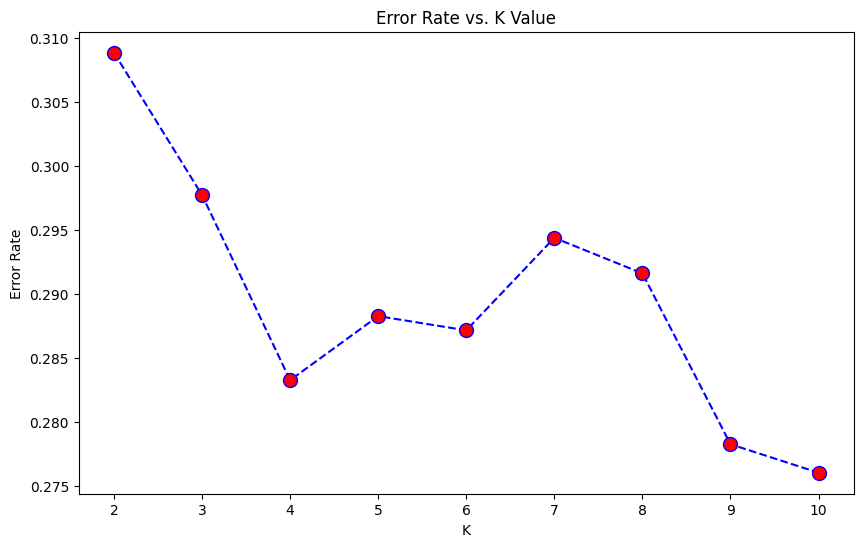

In [417]:
# Step:2 Plotting the error rate
plt.figure(figsize=(10,6))
plt.plot(range(2,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [418]:
# Step:3 Get nearst neighbors
knn1 = KNeighborsClassifier(n_neighbors=4)

# Step:4 Fitting the training data
knn1.fit(X_train,y_train)

# Step:5 Prediction on testing data
knn_test_predict = knn1.predict(X_test)

# Step:6 Prediction on training data
knn_train_predict = knn1.predict(X_train)

### EVALUATION

In [419]:
knn_train_accuracy = accuracy_score(y_train,knn_train_predict)
print("Training accuracy of knn model ",knn_train_accuracy*100)
print("Training classification report:\n",classification_report(knn_train_predict,y_train))

Training accuracy of knn model  76.9937369519833
Training classification report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      4594
           1       0.63      0.88      0.73      2591

    accuracy                           0.77      7185
   macro avg       0.77      0.79      0.77      7185
weighted avg       0.81      0.77      0.77      7185



KNN classifier model is slightly perform well on training data.

In [420]:
#### TESTING ACCURACY

In [421]:
knn_test_accuracy = accuracy_score(y_test,knn_test_predict)
print("Testing accuracy of knn model",knn_test_accuracy*100)
print("Testing classification report: \n",classification_report(y_test,knn_test_predict))

Testing accuracy of knn model 71.67501391207568
Testing classification report: 
               precision    recall  f1-score   support

           0       0.68      0.86      0.76       926
           1       0.79      0.56      0.66       871

    accuracy                           0.72      1797
   macro avg       0.73      0.71      0.71      1797
weighted avg       0.73      0.72      0.71      1797



testing score is lagging so i apply bagging

In [423]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

# Step 1: Create KNN model
knn1 = KNeighborsClassifier(n_neighbors=3)

# Step 2: Create Bagging classifier using the new parameter name
bagg = BaggingClassifier(estimator=knn1, n_estimators=50, random_state=42)

# Step 3: Fit the model
bagg.fit(X_train, y_train)

# Step 4: Predict
bagg_predict = bagg.predict(X_test)


In [424]:
#### EVALUATION

In [425]:
bagg_accuracy = accuracy_score(y_test,bagg_predict)
print("Score after bagging:",bagg_accuracy*100)

Score after bagging: 73.62270450751252


slight improve in the score AFTER bagging

### 3.Decision Tree

In [426]:
# Step:1 Importing library and object creation
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

# Step:2 fitting training data
dtc.fit(X_train,y_train)

# Step:3 Prediction on test data
dtc_test_predict = dtc.predict(X_test)

# Step:4 Prediction on training data
dtc_train_predict = dtc.predict(X_train)

## Evaluation

In [427]:
dtc_train_accuracy = accuracy_score(y_train,dtc_train_predict)
print("Training accuracy of Decision tree classifier:",dtc_train_accuracy*100)
print("classification report of training:"'\n',classification_report(y_train,dtc_train_predict))

Training accuracy of Decision tree classifier: 84.74599860821155
classification report of training:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      3565
           1       0.90      0.79      0.84      3620

    accuracy                           0.85      7185
   macro avg       0.85      0.85      0.85      7185
weighted avg       0.85      0.85      0.85      7185



The model performed well on training data

In [428]:
dtc_test_accuracy = accuracy_score(y_test,dtc_test_predict)
print("Training accuracy of Decision tree classifier:",dtc_test_accuracy*100)
print("classification report of training:"'\n',classification_report(y_test,dtc_test_predict))

Training accuracy of Decision tree classifier: 73.3444629938787
classification report of training:
               precision    recall  f1-score   support

           0       0.72      0.80      0.76       926
           1       0.76      0.66      0.71       871

    accuracy                           0.73      1797
   macro avg       0.74      0.73      0.73      1797
weighted avg       0.74      0.73      0.73      1797



The model not performing well on testing data, so we can apply hyperparameter tuning

#### HYPER PARAMETER TUNNING

In [429]:
# Step:1 importing library
from sklearn.model_selection import GridSearchCV

# Step:2 Tunning the parameter
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 30))),
    "min_samples_split":[2, 3, 4,5],
    "min_samples_leaf":list(range(1, 10)),
}


tree_c = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_c, params, scoring="f1", n_jobs=-1, verbose=2, cv=3)

# Fitting traning data
tree_cv.fit(X_train,y_train)

# Get the best parameter
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params}")


Fitting 3 folds for each of 4176 candidates, totalling 12528 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 9, 'min_samples_split': 2, 'splitter': 'random'}


In [430]:
# Step:3 place the parameter on decision tree classifier
dt1=DecisionTreeClassifier(criterion='gini',
                           max_depth=13,min_samples_leaf=1,
                           min_samples_split=2,splitter='best')

In [431]:
# Step:4 fitting training data
dt1.fit(X_train,y_train)

# Step:5 prdiction on testing data
yhat = dt1.predict(X_test)


In [432]:
#### EVALUATION

In [433]:
dt1_test_accuracy = accuracy_score(y_test,yhat)
print("Accuracy score:",dt1_test_accuracy*100)
print("Classification report:"'\n',classification_report(y_test,yhat))

Accuracy score: 72.56538675570395
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.74       926
           1       0.73      0.68      0.71       871

    accuracy                           0.73      1797
   macro avg       0.73      0.72      0.72      1797
weighted avg       0.73      0.73      0.73      1797



Score not improved after hyperparameter tuning

### 4.Random Forest Classifier

In [434]:
# Step:1 import library and object creation
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Step:2 fitting the training data
rf.fit(X_train,y_train)

# Step:3 Prediction on test data
rf_test_predict = rf.predict(X_test)

# Step:4 Prediction on training data
rf_train_predict = rf.predict(X_train)

### Evaluation

In [435]:
## training accuracy

In [436]:
rf_train_accuracy = accuracy_score(y_train,rf_train_predict)
print("Training accuracy of random forest classifier:",rf_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(y_train,rf_train_predict))

Training accuracy of random forest classifier: 84.74599860821155
Classification report of training:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      3565
           1       0.87      0.82      0.84      3620

    accuracy                           0.85      7185
   macro avg       0.85      0.85      0.85      7185
weighted avg       0.85      0.85      0.85      7185



Random forest perform well on training data

In [437]:
## Testing accuracy

In [438]:
rf_test_accuracy = accuracy_score(y_test,rf_test_predict)
print("Testing accuracy of random forest classifier:",rf_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(y_test,rf_test_predict))

Testing accuracy of random forest classifier: 73.23316638842515
Classification report of training:
               precision    recall  f1-score   support

           0       0.73      0.76      0.74       926
           1       0.73      0.71      0.72       871

    accuracy                           0.73      1797
   macro avg       0.73      0.73      0.73      1797
weighted avg       0.73      0.73      0.73      1797



Random forest not perform well on testing data so applying hyperparameter tuning

### Evaluation

In [442]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Step 1: Define the parameter space
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=10)]
max_depth.append(None)
min_samples_split = [2, 5, 15]
min_samples_leaf = [1, 2, 4]

# Step 2: Make parameter grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# Step 3: Create base model
rf_clf1 = RandomForestClassifier(random_state=42)

# Step 4: Setup randomized search
rf_cv = RandomizedSearchCV(
    estimator=rf_clf1,
    param_distributions=random_grid,
    n_iter=100,
    cv=3,
    scoring='f1',
    verbose=3,
    random_state=42,
    n_jobs=-1
)

# Step 5: Fit
rf_cv.fit(X_train, y_train)

# Step 6: Best results
print(f"Best parameters: {rf_cv.best_params_}")
print(f"Best F1 score: {rf_cv.best_score_}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 76}
Best F1 score: 0.726363174769463


In [444]:
from sklearn.metrics import accuracy_score

# Predict using the best estimator found
y_predict = rf_cv.best_estimator_.predict(X_test)

# Now calculate accuracy
test_accuracy = accuracy_score(y_test, y_predict)
print("Testing accuracy after hyperparameter tuning:", test_accuracy * 100)


Testing accuracy after hyperparameter tuning: 74.12353923205343


Score not improved after tuning

### 5.Gradient Boosting Classifier

In [445]:
# Step:1 Object cretion
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(learning_rate=0.1,n_estimators=150,random_state=42)

# Step:2 fitting the training data
gbm.fit(X_train,y_train) ## fitting the data

# Step:3 prediction on test data
gbm_test_predict=gbm.predict(X_test)

# Step:4 Prediction on train data
gbm_train_predict = gbm.predict(X_train)

### Evaluation
training accuracy

In [446]:
gbm_train_accuracy = accuracy_score(y_train,gbm_train_predict)
print("Grediant boosting classifier training accuracy:",gbm_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(y_train,gbm_train_predict))

Grediant boosting classifier training accuracy: 73.77870563674321
Classification report of training:
               precision    recall  f1-score   support

           0       0.72      0.77      0.74      3565
           1       0.76      0.71      0.73      3620

    accuracy                           0.74      7185
   macro avg       0.74      0.74      0.74      7185
weighted avg       0.74      0.74      0.74      7185



In [440]:
## testing accuracy

In [447]:
gbm_test_accuracy = accuracy_score(y_test,gbm_test_predict)
print("Grediant boosting classifier testing accuracy:",gbm_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(y_test,gbm_test_predict))

Grediant boosting classifier testing accuracy: 73.0105731775181
Classification report of testing:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       926
           1       0.72      0.72      0.72       871

    accuracy                           0.73      1797
   macro avg       0.73      0.73      0.73      1797
weighted avg       0.73      0.73      0.73      1797



Gradient booster works well with train and test data

### 6.Artifial Neural Network

In [448]:
# Step:1 Importing library and object creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,2),
                      learning_rate='constant',
                      max_iter=1000,
                      random_state=45)

# Step:2 Fitting the training data
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(50, 2), max_iter=1000, random_state=45)

In [449]:
# Step:3 Predicting the probability
mlp_prdict_probability = model.predict_proba(X_test)
mlp_prdict_probability

array([[0.37428105, 0.62571895],
       [0.46989155, 0.53010845],
       [0.66237998, 0.33762002],
       ...,
       [0.55284119, 0.44715881],
       [0.1932443 , 0.8067557 ],
       [0.48058604, 0.51941396]])

In [450]:
# Step:4 Prediction on test data
mlp_test_predict = model.predict(X_test)

# Step:5 Prediction on training data
mlp_train_predict = model.predict(X_train)

Training Accuracy

In [451]:
mlp_train_accuracy = accuracy_score(mlp_train_predict,y_train)
print("Training accuracy of MLP model is:",mlp_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(mlp_train_predict,y_train))

Training accuracy of MLP model is: 68.3089770354906
Classification report of training:
               precision    recall  f1-score   support

           0       0.69      0.68      0.68      3648
           1       0.67      0.69      0.68      3537

    accuracy                           0.68      7185
   macro avg       0.68      0.68      0.68      7185
weighted avg       0.68      0.68      0.68      7185



testing Accuracy

In [452]:
mlp_test_accuracy = accuracy_score(mlp_test_predict,y_test)
print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(mlp_test_predict,y_test))

Testing accuracy of MLP model is: 68.22481914301613
Classification report of testing:
               precision    recall  f1-score   support

           0       0.67      0.70      0.68       877
           1       0.70      0.66      0.68       920

    accuracy                           0.68      1797
   macro avg       0.68      0.68      0.68      1797
weighted avg       0.68      0.68      0.68      1797



ANN model is not perform well on training and testing data

### Conclusion
* From above all model I select Grediant Bossting classifier, beacuse this model perform well on training as well as testing side and low variance and low bias model.